### Verificación de números pseudoaleatorios
#### Por: Florencio Peralta

In [12]:
#Librerías
import math
import random
import numpy as np
import matplotlib.pyplot as plt

#### Calcular, graficar y obtener el valor de Chi-Cuadrado para los siguientes generadores, con las siguientes semillas:

1. Cuadrados medios: Xo = 74731897457, n = 7.
2. Congruencia lineal: Xo = 7, a = 74731897457, b = 37747318974, m = 19.
3. Tausworthe: q = 7, r = 3, l = 5.
4. Random de Python: seed = 11052022.


#### 1. Cuadrados medios: Xo = 74731897457, n = 7.

Valores de Chi: {0.0: 6, 0.1: 9, 0.2: 10, 0.3: 10, 0.4: 6, 0.5: 12, 0.6: 13, 0.7: 11, 0.8: 7, 0.9: 16}
Valor Chi: 9.200000000000001
Grafica


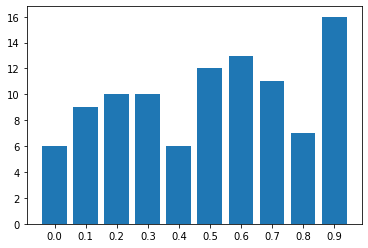

In [9]:
Xo = 74731897457
n = 7
itera =  100
resul = []
xn = Xo
for i in range(itera):
  xnn = xn**2
  txnn = str(xnn).zfill(8)
  tam = len(txnn)
  ui = int(txnn[int(tam/2-n/2):int(tam/2+n/2)])
  rn = ui / (int('9'*n)+1)
  resul.append(rn)
  xn = ui

#Se le hace funcion al calculo de Chi-cuadrado ya que se va a utilizar en varios metodos
#Funcio Chi, para Clasificar los numeros por cada intervalo
def chi(resul):
  tablas = {}
  for i in np.arange(0.1, 1.1, 0.1): # Separacion en los intervalos establecidos
    for j in resul:
      if j > i-0.1 and j <= i: 
        tablas[round(i-0.1,1)] = tablas[round(i-0.1,1)]+1 if round(i-0.1,1) in tablas else 1
  return tablas

#Funcion para aplicar la sumatoria 
def sum_chi(resul, num):
  return sum([(valor-num)**2/num for valor in resul.values()])

valoresChi = chi(resul)

print ("Valores de Chi: " + str(valoresChi))


print("Valor Chi: " + str(sum_chi(valoresChi, 10)))


#Lo de graficar tambien se le hace funcion, ya que se utilizara varias veces
def graf(resul):
  print("Grafica")
  plt.bar(range(len(resul)), list(resul.values()), tick_label=list(resul.keys()))
  plt.show()

graf(valoresChi) 

#### 2. Congruencia lineal: Xo = 7, a = 74731897457, b = 37747318974, m = 19.

Valores de Chi: {0.1: 11, 0.3: 22, 0.6: 11, 0.7: 11, 0.8: 23, 0.9: 11}
Valor Chi: 31.7
Grafica


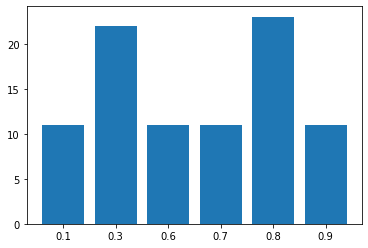

In [11]:
Xo = 7
a = 74731897457
b = 37747318974
m = 19
itera =  100
resul = []
xn = Xo
for i in range(itera):
    xnn = (a*xn+b) % m
    ui = xnn/m
    # print(str(i) + "\t"+ str(xnn)+"\t"+str(ui))
    resul.append(ui)
    xn = xnn
valoresChi = chi(resul)
print ("Valores de Chi: " + str(valoresChi))
print("Valor Chi: " + str(sum_chi(valoresChi, 10)))
graf(valoresChi) 

#### 3. Tausworthe: q = 7, r = 3, l = 5.

Valores de Chi: {0.0: 9, 0.1: 9, 0.2: 11, 0.3: 10, 0.4: 13, 0.5: 9, 0.6: 8, 0.7: 12, 0.8: 8, 0.9: 10}
Valor Chi: 2.5
Grafica


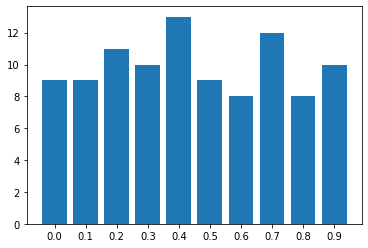

In [14]:
# Es necesario una funcion para transformar los numeros de Binario a Decimal
def binario_a_decimal(numero_binario):
	numero_decimal = 0 

	for posicion, digito_string in enumerate(numero_binario[::-1]):
		numero_decimal += int(digito_string) * 2 ** posicion

	return numero_decimal
q = 7
r = 3
l = 5
itera = 100
bits =[]

for x in range(0,q):
    bits.append(1)

# cantidad = (2**q) - 1 - q
cantidad = itera*l

for i in range(q+1,cantidad+1):
    if bits[(i-r)-1] == bits[(i-q)-1]:
        bits.append(0)
    else:
        bits.append(1)

vector = ''
for x in range(0,len(bits)):
    vector = vector + str(bits[x])
    if (x+1) % q == 0:
        vector += ' '

nGrupos = math.floor(len(bits)/l)

grupos=[bits[i:i + l] for i in range(0, len(bits), l)]

decimales = []

for x in grupos:
    binario = ''
    for b in x:
        binario += str(b)
    decimales.append(binario_a_decimal(binario))
dividido = ''
divisor = 2**l
resul = []
for x in decimales:
    dividido += str(x) + '/' + str(divisor) + ",  "
    resul.append(x/divisor)

valoresChi = chi(resul)
print ("Valores de Chi: " + str(valoresChi))
print("Valor Chi: " + str(sum_chi(valoresChi, 10)))
graf(valoresChi) 

#### 4. Random de Python: seed = 11052022.

Valores de Chi: {0.0: 15, 0.1: 11, 0.2: 14, 0.3: 10, 0.4: 2, 0.5: 17, 0.6: 8, 0.7: 9, 0.8: 7, 0.9: 7}
Valor Chi: 17.8
Grafica


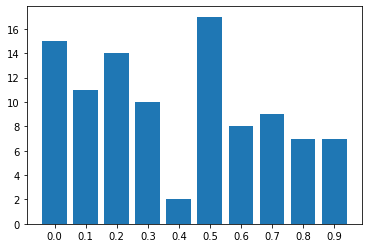

In [15]:
seed = 11052022
itera = 100
resul = []
random.seed(seed)
[resul.append(random.random())for i in range(itera)]
valoresChi = chi(resul)
print ("Valores de Chi: " + str(valoresChi))
print("Valor Chi: " + str(sum_chi(valoresChi, 10)))
graf(valoresChi) 